In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
from numba import njit

In [3]:
import numba

levenberg optimization

In [4]:
%load_ext autoreload
%autoreload 2


In [294]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_store_numba import *


In [6]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [7]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [8]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')


In [9]:
refdf.columns

Index(['day', 'Sample', 'id', 'replicate', 'transfer', 'transfer day',
       'heterotroph', 'full name', 'FL', 'Group', 'predicted', 'ref_Bp', 'LOD',
       't'],
      dtype='object')

In [346]:
param_vals = get_param_vals('MIN')
#param_vals = get_param_vals('OVERFLOW')
#param_vals = get_param_vals('MIXOTROPH')
#param_vals = get_param_vals('EXOENZYME')


In [347]:
param_vals

{'Mh': 1.157407407407407e-06,
 'Mp': 1.157407407407407e-06,
 'gammaDp': 0.6,
 'gammaDh': 0.6,
 'Rp': 7.0,
 'Rh': 4.5,
 'E_leakp': 1.157407407407407e-06,
 'E_leakh': 1.157407407407407e-06,
 'KONp': 0.1427507995452611,
 'KINp': 0.1427507995452611,
 'KOCp': 0.1427507995452611,
 'KICp': 0.1427507995452611,
 'KONh': 0.2502723352076287,
 'KINh': 0.2502723352076287,
 'KOCh': 0.2502723352076287,
 'KICh': 0.2502723352076287,
 'VmaxONp': 0.0,
 'VmaxINp': 3.82335614000937e-05,
 'VmaxOCp': 0.0,
 'VmaxICp': 0.0002676349298006559,
 'VmaxONh': 4.81243710628233e-05,
 'VmaxINh': 4.81243710628233e-05,
 'VmaxOCh': 0.00021655966978270484,
 'VmaxICh': 0.0,
 'OverflowMode': 0.0,
 'E_ROSp': 0.0,
 'E_ROSh': 0.0,
 'VmaxROSh': 0.0,
 'K_ROSh': 0.2502723352076287,
 'ROS_decay': 1.1574074074074074e-07,
 'MROSp': 0.0,
 'MROSh': 0.0,
 'MKROSp': 0.1427507995452611,
 'MKROSh': 0.1427507995452611,
 'KABp': 0.1427507995452611,
 'KABh': 0.1427507995452611,
 'EABp': 0.0,
 'EABh': 0.0,
 'decayABh': 0.0,
 'decayABp': 0.0,
 

In [348]:
var_names, var_vals =  get_main_init_vars(pro99_mode=False)


In [349]:
0.17 * alt_vol**0.27

In [350]:
# fg -> umol 14 (N mulecular weight) * 1e-9 (fmol -> umol)
# umol N / cell
Qp = 25  * 1e-9 / 14
Qp

In [351]:
# vmax per cell
9.1e-9 * pro_vol**0.67


In [352]:
# vmax per cell
9.1e-9 * pro_vol**0.67 / Qp / seconds_in_day


In [353]:
# vmax per cell
9.1e-9 * alt_vol**0.67  / Qh / seconds_in_day


In [354]:
R_P

In [355]:
pro_vol, alt_vol

In [356]:
1 /0.05

In [357]:
par_tuple = prepare_params_tuple_cc(param_vals)
par_tuple

(array([7. , 4.5]),
 array([10., 10.]),
 array([4., 4.]),
 array([[0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234],
        [0.1427508 , 0.25027234]]),
 array([[3.82335614e-05, 4.81243711e-05],
        [0.00000000e+00, 4.81243711e-05],
        [2.67634930e-04, 0.00000000e+00],
        [0.00000000e+00, 2.16559670e-04]]),
 array([3.5e-05, 3.5e-05]),
 0.0,
 array([0.01, 0.01]),
 array([2.08333333e-06, 2.08333333e-06]),
 array([1.15740741e-06, 1.15740741e-06]),
 array([1.15740741e-06, 1.15740741e-06]),
 array([0., 0.]),
 0.0,
 0.2502723352076287,
 array([0., 0.]),
 array([0.6, 0.6]),
 1.1574074074074074e-07,
 0.0,
 array([0., 0.]))

In [358]:
par_tuple_ponly = prepare_params_tuple_ponly(param_vals)
par_tuple_ponly

(array([7.]),
 array([10.]),
 array([4.]),
 array([[0.1427508],
        [0.1427508],
        [0.1427508],
        [0.1427508]]),
 array([[3.82335614e-05],
        [0.00000000e+00],
        [2.67634930e-04],
        [0.00000000e+00]]),
 array([3.5e-05]),
 0.0,
 array([0.01]),
 array([2.08333333e-06]),
 array([1.15740741e-06]),
 array([1.15740741e-06]),
 array([0.]),
 0.0,
 0.2502723352076287,
 array([0.]),
 array([0.6]),
 1.1574074074074074e-07,
 0.0,
 array([0.]))

In [370]:
dBpdt, dNpdt, dCpdt, dBhdt, dNhdt, dChdt, dDONdt, dRDONdt, dDINdt, dDOCdt, dRDOCdt, dDICdt, dROSdt = basic_model_cc_ode(0, var_vals, par_tuple)

In [371]:
%timeit -r 4 -n 10000 basic_model_cc_ode(0, var_vals, par_tuple)


24.6 µs ± 169 ns per loop (mean ± std. dev. of 4 runs, 10,000 loops each)


In [372]:
var_names_ponly, var_vals_ponly =  get_ponly_init_vars(pro99_mode=False)


ValueError: too many values to unpack (expected 2)

In [308]:
res = basic_model_ponly_ode(0, var_vals_ponly, par_tuple_ponly)

In [311]:
%timeit -r 4 -n 10000 basic_model_ponly_ode(0, var_vals_ponly, par_tuple_ponly)


10.7 µs ± 45.7 ns per loop (mean ± std. dev. of 4 runs, 10,000 loops each)


In [280]:
print_dydt0(basic_model_cc_ode, var_names, var_vals, par_tuple)

dBp/dt = -4.13e-06, init Bp = 1.79e+00, newval = 1.79e+00
dNp/dt = 2.92e-05, init Np = 0.00e+00, newval = 2.92e-05
dCp/dt = 1.17e-04, init Cp = 0.00e+00, newval = 1.17e-04
dBh/dt = -6.61e-05, init Bh = 2.86e+01, newval = 2.86e+01
dNh/dt = 3.03e-04, init Nh = 0.00e+00, newval = 3.03e-04
dCh/dt = 3.13e-03, init Ch = 0.00e+00, newval = 3.13e-03
dDON/dt = -9.47e-05, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 1.41e-05, init RDON = 0.00e+00, newval = 1.41e-05
dDIN/dt = -1.82e-04, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -3.14e-03, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 6.53e-05, init RDOC = 0.00e+00, newval = 6.53e-05
dDIC/dt = 1.51e-04, init DIC = 2.24e+03, newval = 2.24e+03
dROS/dt = 0.00e+00, init ROS = 2.00e-01, newval = 2.00e-01


In [281]:
biomass_diff0(basic_model_cc_ode, var_names, var_vals, par_tuple)

dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -2.710505431213761e-20
dBp/dt + dBh/dt + dDOC/dt + dRDOC/dt + dDIC/dt = -2.168404344971009e-19


In [330]:
sol = run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple)


In [331]:
sol = run_solver_ivp(basic_model_ponly_ode, var_vals_ponly, days=140, t_eval=None, par_tuple=par_tuple_ponly)


In [332]:
%timeit -r 4 -n 2  run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple)


2.92 s ± 2.78 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [333]:
%timeit -r 4 -n 2  run_solver_ivp(basic_model_ponly_ode, var_vals_ponly, days=140, t_eval=None, par_tuple=par_tuple_ponly)


2.87 s ± 17.7 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [314]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 24327
     njev: 5
      nlu: 3742
      sol: None
   status: 0
  success: True
        t: array([       0,    14400,    28800,    43200,    57600,    72000,
          86400,   100800,   115200,   129600,   144000,   158400,
         172800,   187200,   201600,   216000,   230400,   244800,
         259200,   273600,   288000,   302400,   316800,   331200,
         345600,   360000,   374400,   388800,   403200,   417600,
         432000,   446400,   460800,   475200,   489600,   504000,
         518400,   532800,   547200,   561600,   576000,   590400,
         604800,   619200,   633600,   648000,   662400,   676800,
         691200,   705600,   720000,   734400,   748800,   763200,
         777600,   792000,   806400,   820800,   835200,   849600,
         864000,   878400,   892800,   907200,   921600,   936000,
         950400,   964800,   979200,   993600,  1008000,  1022400,
        1036

In [369]:
par_tuple[4], list(par_tuple[4].flat)

(array([[3.82335614e-05, 4.81243711e-05],
        [0.00000000e+00, 4.81243711e-05],
        [2.67634930e-04, 0.00000000e+00],
        [0.00000000e+00, 2.16559670e-04]]),
 [3.82335614000937e-05,
  4.81243710628233e-05,
  0.0,
  4.81243710628233e-05,
  0.0002676349298006559,
  0.0,
  0.0,
  0.00021655966978270484])

In [366]:
[i  for f in par_tuple for i in (f.flat if isinstance(f, np.ndarray) else [f])]
list(par_tuple[12].flat)

In [316]:
df = solver2df_ivp(sol, var_names, par_tuple)


In [317]:
df = solver2df_ivp(sol, var_names_ponly, par_tuple_ponly)


In [318]:
mdf = df.melt(id_vars=['t', 'day'])

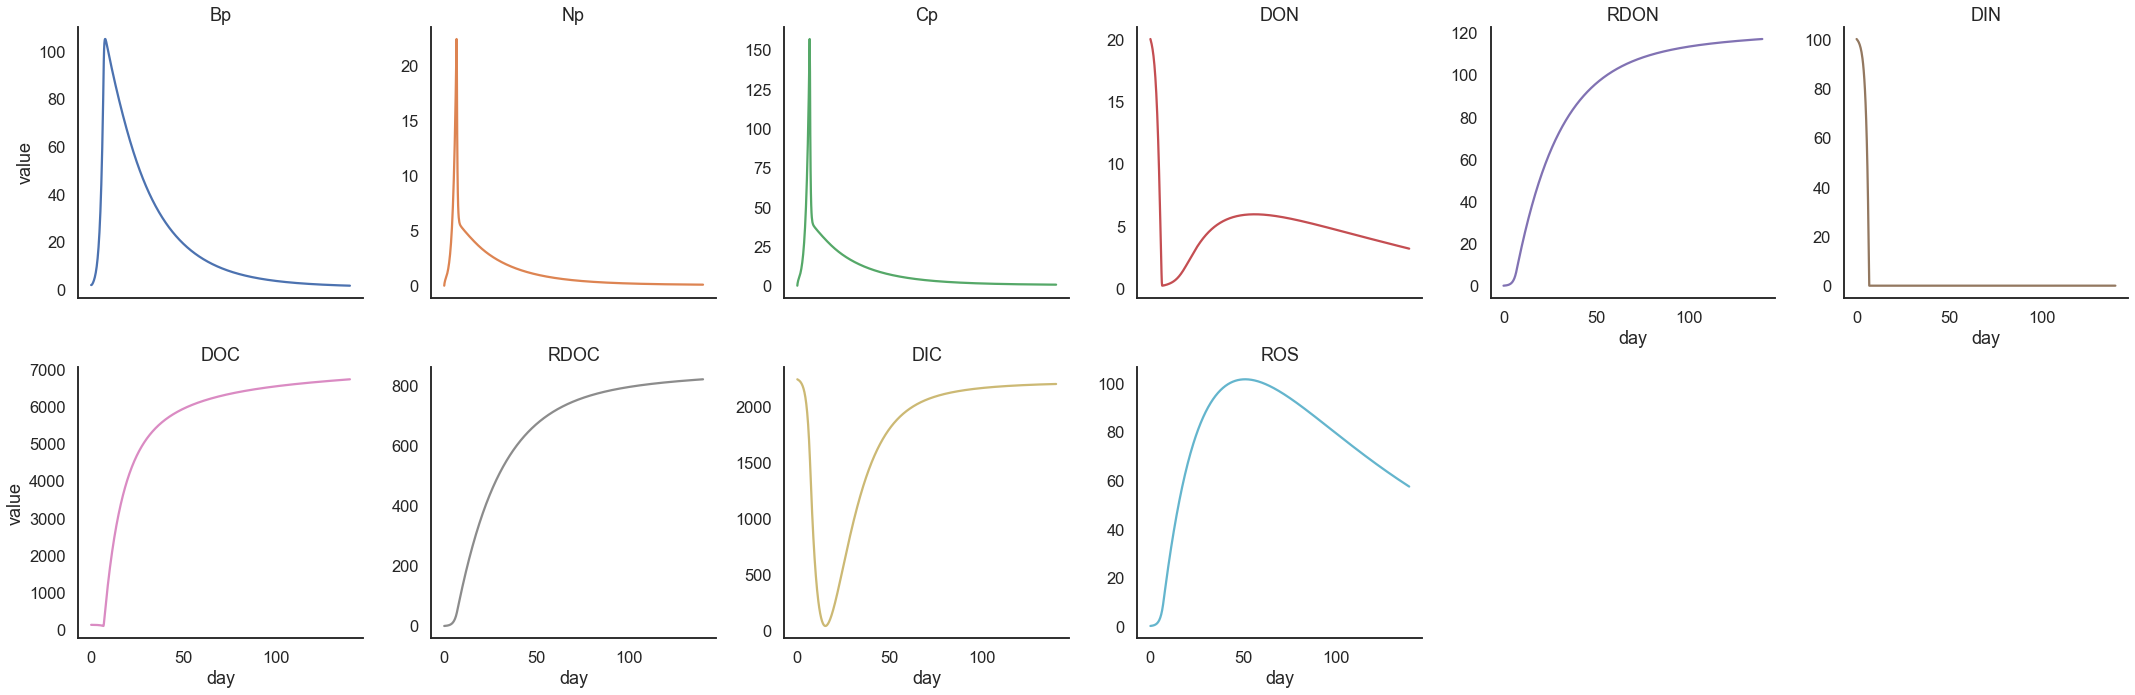

In [319]:
sns.set_context('talk')
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

In [188]:
jac_sparsity = prepare_jac_sparsity_cc(ROS_mode=False)

In [189]:
sol = run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple, jac_sparsity=jac_sparsity)


In [190]:
%timeit -r 4 -n 2  run_solver_ivp(basic_model_cc_ode, var_vals, days=140, t_eval=None, par_tuple=par_tuple, jac_sparsity=jac_sparsity)


3.16 s ± 28.7 ms per loop (mean ± std. dev. of 4 runs, 2 loops each)


In [191]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 24458
     njev: 12
      nlu: 2900
      sol: None
   status: 0
  success: True
        t: array([       0,    14400,    28800,    43200,    57600,    72000,
          86400,   100800,   115200,   129600,   144000,   158400,
         172800,   187200,   201600,   216000,   230400,   244800,
         259200,   273600,   288000,   302400,   316800,   331200,
         345600,   360000,   374400,   388800,   403200,   417600,
         432000,   446400,   460800,   475200,   489600,   504000,
         518400,   532800,   547200,   561600,   576000,   590400,
         604800,   619200,   633600,   648000,   662400,   676800,
         691200,   705600,   720000,   734400,   748800,   763200,
         777600,   792000,   806400,   820800,   835200,   849600,
         864000,   878400,   892800,   907200,   921600,   936000,
         950400,   964800,   979200,   993600,  1008000,  1022400,
        103

In [192]:
def solver2df_ivp(sol, var_names, par_tuple):
    d = dict(zip(var_names, sol.y))
    d['t'] = sol.t
    df = pd.DataFrame(data=d)
    df['day'] = df['t']/seconds_in_day
    return df

In [193]:
df = solver2df_ivp(sol, var_names, par_tuple)


In [194]:
mdf = df.melt(id_vars=['t', 'day'])

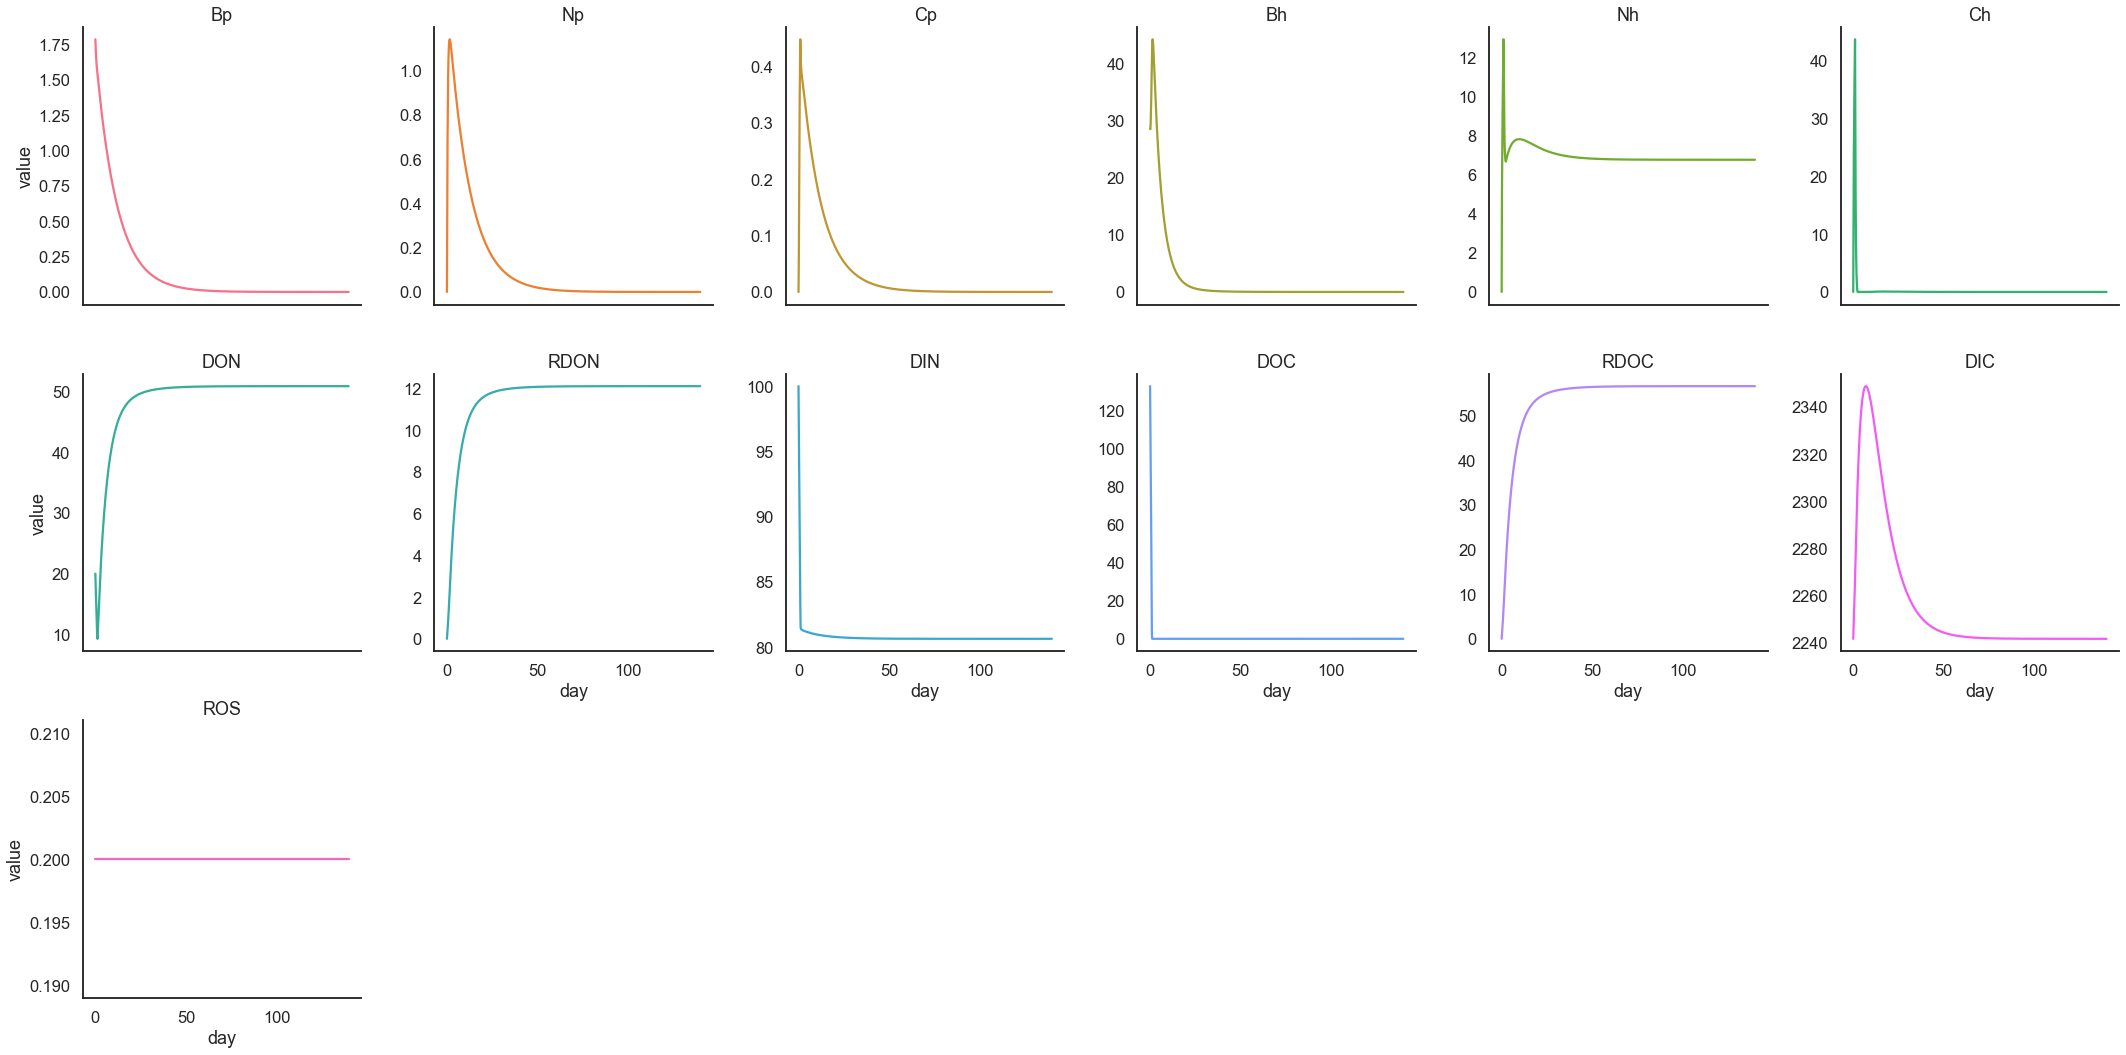

In [195]:
sns.set_context('talk')
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')
plt.show()

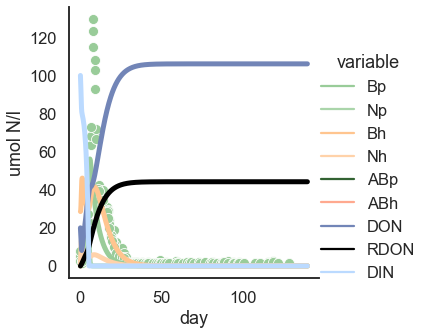

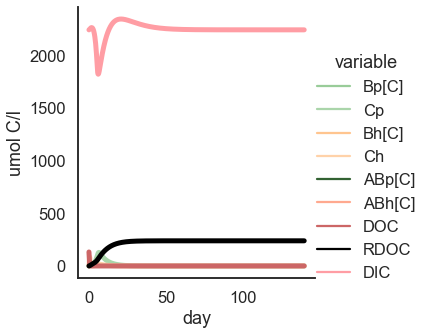

In [289]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, #legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol N/l', )
sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, #legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol C/l', )
#sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

# g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
#             x='day', y='value', hue='variable',
#             kind='line', 
#             lw=5, legend=False,
#             palette=ccxpalette, hue_order=ccxorder,
#            ).set(ylabel='cells/l')
#sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
#sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)
plt.show()

In [156]:
df.Bh.value_counts()

28.571429    1
10.234618    1
10.117875    1
10.060045    1
10.002572    1
            ..
29.633122    1
29.703549    1
29.789616    1
29.898123    1
1.829349     1
Name: Bh, Length: 912, dtype: int64

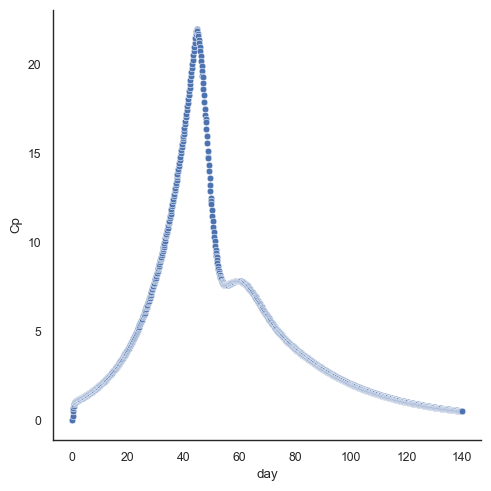

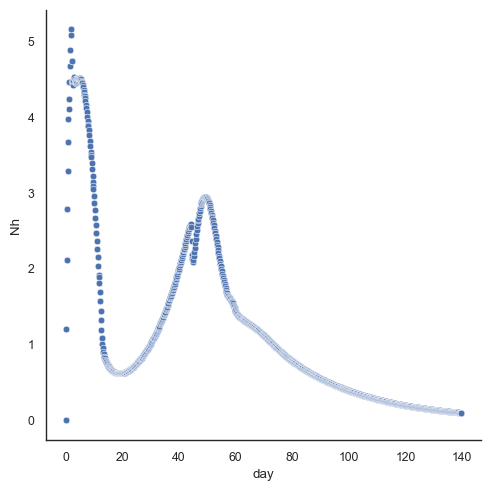

In [157]:
sns.set_context('paper')
sns.relplot(data=df, x='day', y='Cp')
sns.relplot(data=df, x='day', y='Nh')
#plt.ylim((0,0.0002))
#plt.yscale('log')
plt.show()

In [158]:
df.columns

Index(['Bp', 'Np', 'Cp', 'Bh', 'Nh', 'Ch', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC',
       'DIC', 'ROS', 'ABp', 'ABh', 't', 'day', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeINh', 'gross_uptakeONh',
       'gross_uptakeICp', 'gross_uptakeOCp', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNp', 'uptakeNh', 'uptakeCp', 'uptakeCh',
       'regQCp', 'regQCh', 'regQNp', 'regQNh', 'bio_synthesisN_p',
       'bio_synthesisN_h', 'respirationCp', 'respirationCh',
       'biomass_breakdown_for_respirationCp',
       'biomass_breakdown_for_respirationCh', 'netDeltaNp', 'netDeltaNh',
       'netDeltaCp', 'netDeltaCh', 'store_keepNp', 'store_keepNh',
       'overflowNp', 'overflowNh', 'overflowCp', 'overflowCh',
       'dic_air_water_exchange', 'ABreleasep', 'ABreleaseh', 'death_ratep',
       'death_rateh', 'deathp', 'deathh', 'leakinessOp', 'leakinessIp',
       'leakinessOh', 'leakinessIh', 'ROSreleasep', 'ROSreleaseh',
       'ROSbreakdownh', 'DON2DINp', 'DON2DINh', 'Bp[C]', 'B

In [159]:
df.clip(lower=0)

,Bp,Np,Cp,Bh,Nh,Ch,DON,RDON,DIN,DOC,...,leakinessIh,ROSreleasep,ROSreleaseh,ROSbreakdownh,DON2DINp,DON2DINh,Bp[C],Bh[C],ABp[C],ABh[C]
0,1.785714,0.000000,0.000000,28.571429,0.000000,0.000000,20.000000,0.000000,100.000000,132.500000,...,0.0,0.0,0.0,0.0,0.000004,0.000066,12.500000,128.571429,0.0,0.0
1,1.734858,0.650016,0.240120,27.949693,1.211440,9.627725,19.062085,0.199777,99.549273,121.329723,...,0.0,0.0,0.0,0.0,0.000004,0.000062,12.144006,125.773617,0.0,0.0
2,1.704601,0.981799,0.501170,27.872156,2.121107,16.395596,18.059795,0.397048,99.220636,110.594181,...,0.0,0.0,0.0,0.0,0.000004,0.000058,11.932204,125.424704,0.0,0.0
3,1.691595,1.159270,0.697294,28.184777,2.788881,21.233768,17.031949,0.595036,98.905635,99.989676,...,0.0,0.0,0.0,0.0,0.000003,0.000056,11.841165,126.831497,0.0,0.0
4,1.690644,1.259630,0.832465,28.772716,3.285058,24.804907,15.996170,0.796036,98.556890,89.323361,...,0.0,0.0,0.0,0.0,0.000003,0.000053,11.834507,129.477220,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,1.390216,0.433961,0.533036,1.871726,0.102526,0.599385,7.017639,139.529395,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.731513,8.422765,0.0,0.0
908,1.382280,0.431484,0.529993,1.861040,0.101941,0.595963,7.017639,139.551079,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.675958,8.374681,0.0,0.0
909,1.374389,0.429021,0.526967,1.850416,0.101359,0.592561,7.017639,139.572640,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000002,9.620720,8.326872,0.0,0.0
910,1.366543,0.426571,0.523959,1.839852,0.100780,0.589178,7.017639,139.594077,0.011680,0.239050,...,0.0,0.0,0.0,0.0,0.000001,0.000001,9.565798,8.279336,0.0,0.0


In [174]:
from matplotlib.colors import LinearSegmentedColormap
df.clip(lower=0)[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df.clip(lower=0)[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


KeyError: "['ABp', 'ABh'] not in index"